COSAS POR HACER

1 REORDENAR LAS TABLAS DE AÑO 2012

2 CAMBIARLE LOS NOMBRES A LA SEGUNDA TABLA

3 SEPARAR LOS ELEMENTOS EN PERIODO A SEMANA Y PERIODO

4 ELIMINAR ELEMENTOS DAÑADOS Y NULOS

POSDATA: AVISARLE AL SERNAPESCA QUE NO ENTIENDO QUE ACS ES EL MODIF DESCANSO 2 :)


In [1]:
#Sector Pinox
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk


archivo = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx')
# 'archivo' already contains the excel data, access sheets directly
df = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx', sheet_name="2014-2024")  # Changed to read the original file
df2 = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx', sheet_name="2012-2013") # Changed to read the original file
archivo.info()
print(df.head())
archivo.describe()
print(df2.head())
archivo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137143 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            137143 non-null  object 
 1   semana                   137143 non-null  int64  
 2   Año                      137143 non-null  int64  
 3   Región                   137143 non-null  object 
 4   ACS                      137143 non-null  object 
 5   Especie                  137143 non-null  object 
 6   Prom. Hembras Ovígeras   137143 non-null  float64
 7   Prom. Adultos Móviles    137143 non-null  float64
 8   Prom. Juveniles          137143 non-null  float64
 9   Prom. Parásitos Totales  137143 non-null  float64
 10  Temperatura              137143 non-null  object 
 11  Salinidad                137143 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 12.6+ MB
  Código Centro  semana   Año    Región       ACS       

,Código Centro,semana,Año,Región,ACS,Especie,Prom. Hembras Ovígeras,Prom. Adultos Móviles,Prom. Juveniles,Prom. Parásitos Totales,Temperatura,Salinidad
0,100068,1,2014,X REGION,ACS 10 A,Salmon Del Atlantico,0.750,1.400,2.900,5.050000,13.1,32
1,100104,1,2014,X REGION,ACS 10 A,Trucha Arcoiris,4.650,4.275,3.275,12.200001,11.8,35
2,100176,1,2014,X REGION,ACS 17 A,Trucha Arcoiris,2.600,2.900,2.600,8.100000,15.6,20
3,100182,1,2014,X REGION,ACS 3 B,Salmon Del Atlantico,1.200,1.250,0.925,3.375000,12,32
4,100189,1,2014,X REGION,ACS 3 B,Trucha Arcoiris,4.575,3.375,2.575,10.525000,12.8,32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137143 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            137143 non-null  object 
 1   semana                   137143 non-null  int64  
 2   Año                      137143 non-null  int64  
 3   Región                   137143 non-null  object 
 4   ACS                      137143 non-null  object 
 5   Especie                  137143 non-null  object 
 6   Prom. Hembras Ovígeras   137143 non-null  float64
 7   Prom. Adultos Móviles    137143 non-null  float64
 8   Prom. Juveniles          137143 non-null  float64
 9   Prom. Parásitos Totales  137143 non-null  float64
 10  Temperatura              137143 non-null  object 
 11  Salinidad                137143 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 12.6+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46178 entries, 0 to 46177
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Período                     46175 non-null  object 
 1   Cóigo Centro                46175 non-null  float64
 2   Región                      46175 non-null  object 
 3   ACS                         46175 non-null  object 
 4   Especie                     46175 non-null  object 
 5   Temperatura Promedio        46175 non-null  float64
 6   Salinidad Promedio          46175 non-null  float64
 7   Promedio Juv,               46175 non-null  float64
 8   Promedio HO                 46175 non-null  float64
 9   Promedio AM                 46175 non-null  float64
 10  Parásitos totales promedio  19378 non-null  float64
 11  Promedio HO+AM              46175 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.2+ MB


In [2]:
# Filtrar filas donde 'ACS' contiene "ACS" y no hay valores " - " en ninguna columna
df_cleaned = df[df['ACS'].str.contains('ACS', na=False)]
df_cleaned = df_cleaned[~df_cleaned.isin(['-']).any(axis=1)]
df_cleaned['Temperatura'] = pd.to_numeric(df_cleaned['Temperatura'], errors='coerce')
df_cleaned['Salinidad'] = pd.to_numeric(df_cleaned['Salinidad'], errors='coerce')

# Verificar el resultado
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 134736 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            134736 non-null  object 
 1   semana                   134736 non-null  int64  
 2   Año                      134736 non-null  int64  
 3   Región                   134736 non-null  object 
 4   ACS                      134736 non-null  object 
 5   Especie                  134736 non-null  object 
 6   Prom. Hembras Ovígeras   134736 non-null  float64
 7   Prom. Adultos Móviles    134736 non-null  float64
 8   Prom. Juveniles          134736 non-null  float64
 9   Prom. Parásitos Totales  134736 non-null  float64
 10  Temperatura              134736 non-null  float64
 11  Salinidad                134736 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 13.4+ MB


In [ ]:
df_cleaned.to_excel('Archivo1 Limpio.xlsx', index = False)

In [ ]:
df2.head()

,Período,Cóigo Centro,Región,ACS,Especie,Temperatura Promedio,Salinidad Promedio,"Promedio Juv,",Promedio HO,Promedio AM,Parásitos totales promedio,Promedio HO+AM
0,Semana 1 (2-ENE-2012 al 8-ENE-2012),110228.0,XI REGION,ACS 25 B,SALMON PLATEADO O COHO,12.55,20.0,0.00,0.00,0.00,0.00,0.0
1,Semana 1 (2-ENE-2012 al 8-ENE-2012),110261.0,XI REGION,ACS 25 B,SALMON DEL ATLANTICO,12.00,22.0,0.00,0.00,0.00,0.00,0.0
2,Semana 1 (2-ENE-2012 al 8-ENE-2012),110714.0,XI REGION,ACS 26 A,SALMON DEL ATLANTICO,12.00,29.0,1.50,1.12,0.88,3.50,2.0
3,Semana 1 (2-ENE-2012 al 8-ENE-2012),104085.0,X REGION,ACS 8,SALMON DEL ATLANTICO,15.70,32.0,0.08,0.00,0.00,0.08,0.0
4,Semana 1 (2-ENE-2012 al 8-ENE-2012),110260.0,XI REGION,ACS 25 A,SALMON PLATEADO O COHO,11.70,19.0,0.00,0.00,0.00,0.00,0.0


In [3]:
# Esto calculará la suma fila por fila para cada registro en las columnas especificadas
# Completar la columna 'Parásitos totales promedio' en df2
df2['Parásitos totales promedio'] = df2['Promedio Juv,'] + df2['Promedio HO'] + df2['Promedio AM']

# Verificar el resultado
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46178 entries, 0 to 46177
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Período                     46175 non-null  object 
 1   Cóigo Centro                46175 non-null  float64
 2   Región                      46175 non-null  object 
 3   ACS                         46175 non-null  object 
 4   Especie                     46175 non-null  object 
 5   Temperatura Promedio        46175 non-null  float64
 6   Salinidad Promedio          46175 non-null  float64
 7   Promedio Juv,               46175 non-null  float64
 8   Promedio HO                 46175 non-null  float64
 9   Promedio AM                 46175 non-null  float64
 10  Parásitos totales promedio  46175 non-null  float64
 11  Promedio HO+AM              46175 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.2+ MB


In [10]:
# Filtrar filas donde 'ACS' contiene "ACS" y no hay valores " - " en ninguna columna
df_cleaned2 = df2[df2['ACS'].str.contains('ACS', na=False)]
df_cleaned2 = df_cleaned2[~df_cleaned2.isin(['-']).any(axis=1)]
df_cleaned2.rename(columns={'Cóigo Centro': 'Código Centro'}, inplace=True)
# Extraer el número de la semana y el año de la columna 'Período'
df_cleaned2['semana'] = df_cleaned2['Período'].str.extract(r'Semana (\d+)').astype(int)
df_cleaned2['Año'] = df_cleaned2['Período'].str.extract(r'(\d{4})').astype(int)

# Guardar los cambios en un nuevo dataset
df_cleaned22 = df_cleaned2.copy()
# Verificar el resultado
df_cleaned22.head()

,Período,Código Centro,Región,ACS,Especie,Temperatura Promedio,Salinidad Promedio,"Promedio Juv,",Promedio HO,Promedio AM,Parásitos totales promedio,Promedio HO+AM,semana,Año
0,Semana 1 (2-ENE-2012 al 8-ENE-2012),110228.0,XI REGION,ACS 25 B,SALMON PLATEADO O COHO,12.55,20.0,0.00,0.00,0.00,0.00,0.0,1,2012
1,Semana 1 (2-ENE-2012 al 8-ENE-2012),110261.0,XI REGION,ACS 25 B,SALMON DEL ATLANTICO,12.00,22.0,0.00,0.00,0.00,0.00,0.0,1,2012
2,Semana 1 (2-ENE-2012 al 8-ENE-2012),110714.0,XI REGION,ACS 26 A,SALMON DEL ATLANTICO,12.00,29.0,1.50,1.12,0.88,3.50,2.0,1,2012
3,Semana 1 (2-ENE-2012 al 8-ENE-2012),104085.0,X REGION,ACS 8,SALMON DEL ATLANTICO,15.70,32.0,0.08,0.00,0.00,0.08,0.0,1,2012
4,Semana 1 (2-ENE-2012 al 8-ENE-2012),110260.0,XI REGION,ACS 25 A,SALMON PLATEADO O COHO,11.70,19.0,0.00,0.00,0.00,0.00,0.0,1,2012


In [ ]:
df_cleaned2.to_excel('Archivo2 Limpio.xlsx', index = False)

In [ ]:
df_cleaned2.describe()

,Código Centro,Temperatura Promedio,Salinidad Promedio,"Promedio Juv,",Promedio HO,Promedio AM,Parásitos totales promedio,Promedio HO+AM
count,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000
mean,106907.985545,10.960200,28.984107,2.723362,1.828990,1.860366,6.412718,3.689294
std,4571.186536,1.825497,5.085604,6.767838,4.175017,3.914468,13.348841,7.947034
min,100054.000000,1.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102158.000000,9.800000,28.000000,0.220000,0.100000,0.150000,0.690000,0.300000
50%,110193.000000,10.700000,31.000000,1.020000,0.980000,1.050000,3.530000,2.100000
75%,110586.000000,12.050000,32.000000,2.800000,2.400000,2.420000,7.860000,4.880000
max,120128.000000,22.000000,92.000000,295.350000,172.850000,155.270000,466.740000,328.120000


In [5]:
df_cleaned.describe()

,semana,Año,Prom. Hembras Ovígeras,Prom. Adultos Móviles,Prom. Juveniles,Prom. Parásitos Totales,Temperatura,Salinidad
count,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000
mean,26.269067,2018.788943,1.418404,1.883250,2.395443,5.697097,11.004845,28.011943
std,15.075490,3.052937,3.290256,3.947884,5.958211,11.927211,1.935072,5.534747
min,1.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.700000
25%,13.000000,2016.000000,0.000000,0.000000,0.000000,0.050000,10.000000,26.000000
50%,26.000000,2019.000000,0.450000,0.575000,0.525000,1.900000,11.000000,30.000000
75%,39.000000,2021.000000,1.950000,2.350000,2.375000,6.925000,12.200000,32.000000
max,53.000000,2024.000000,177.899994,171.850006,323.233337,454.440002,22.500000,95.800003


In [6]:
# Convertir las columnas a float64 de forma segura
df['Código Centro'] = pd.to_numeric(df['Código Centro'], errors='coerce')
df['Temperatura'] = pd.to_numeric(df['Temperatura'], errors='coerce')
df['Salinidad'] = pd.to_numeric(df['Salinidad'], errors='coerce')

# Verificar los cambios de tipo
df.info()

# Mostrar filas con valores no convertidos (NaN introducidos por 'coerce')
columnas = ['Código Centro', 'Temperatura', 'Salinidad']
nan_rows = df[df[columnas].isna().any(axis=1)]

print("\nFilas con datos no convertibles:")
print(nan_rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137143 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            137142 non-null  float64
 1   semana                   137143 non-null  int64  
 2   Año                      137143 non-null  int64  
 3   Región                   137143 non-null  object 
 4   ACS                      137143 non-null  object 
 5   Especie                  137143 non-null  object 
 6   Prom. Hembras Ovígeras   137143 non-null  float64
 7   Prom. Adultos Móviles    137143 non-null  float64
 8   Prom. Juveniles          137143 non-null  float64
 9   Prom. Parásitos Totales  137143 non-null  float64
 10  Temperatura              137134 non-null  float64
 11  Salinidad                137134 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 12.6+ MB

Filas con datos no convertibles:
        Código Centro 

In [8]:
acs_count = df_cleaned['ACS'].str.contains('ACS', na=False).sum()
# Contar elementos que contienen "ACS"

# Contar elementos que no contienen "ACS"
non_acs_count = len(df_cleaned) - acs_count

print(f"Elementos con 'ACS': {acs_count}")
print(f"Elementos con otra cosa: {non_acs_count}")

Elementos con 'ACS': 134736
Elementos con otra cosa: 0


In [ ]:
# Valores únicos en las columnas Región, semana y Especie
regiones_unicas = df['Región'].unique()
semanas_unicas = df['semana'].unique()
especies_unicas = df['Especie'].unique()

print("Regiones únicas:", regiones_unicas)
print("Semanas únicas:", semanas_unicas)
print("Especies únicas:", especies_unicas)

# Comprobar si hay datos vacíos en la columna 'semana'


Regiones únicas: ['X REGION' 'XI REGION' 'XIV REGION' 'XII REGION' '-']
Semanas únicas: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]
Especies únicas: ['Salmon Del Atlantico' 'Trucha Arcoiris' 'Salmon Plateado O Coho' '-']


In [70]:
# Contar la frecuencia de cada especie
especies_frecuencia2 = df_cleaned2['Especie'].value_counts()
especies_frecuencia = df_cleaned['Especie'].value_counts()

# Obtener las 3 especies más frecuentes
top_3_especies = especies_frecuencia.head(3)
top_3_especies2 = especies_frecuencia2.head(4)
# Mostrar el resultado
print("Las 3 especies que más se repiten son:")
print(top_3_especies)
print(top_3_especies2)

Las 3 especies que más se repiten son:
Especie
Salmon Del Atlantico      112426
Trucha Arcoiris            15128
Salmon Plateado O Coho      7182
Name: count, dtype: int64
Especie
SALMON DEL ATLANTICO      29472
TRUCHA ARCOIRIS           12537
SALMON PLATEADO O COHO     3362
SALMON REY O CHINOOK        151
Name: count, dtype: int64


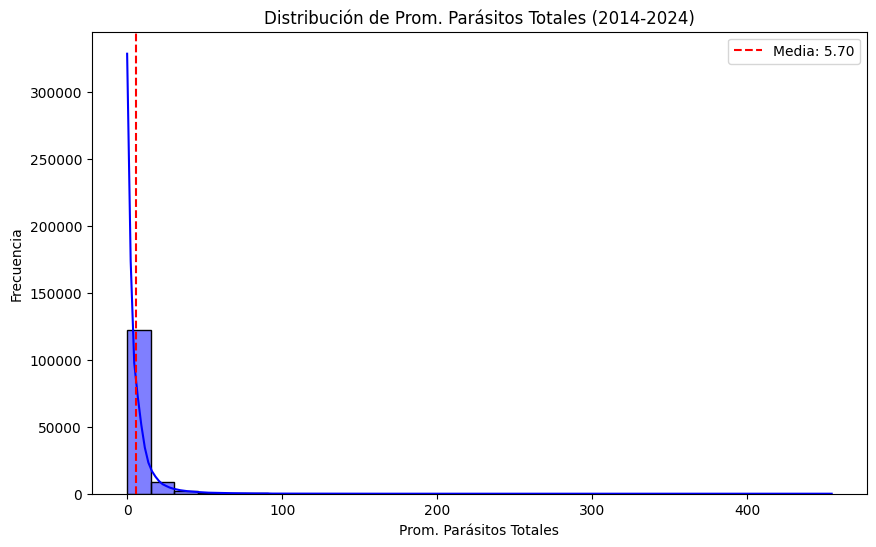

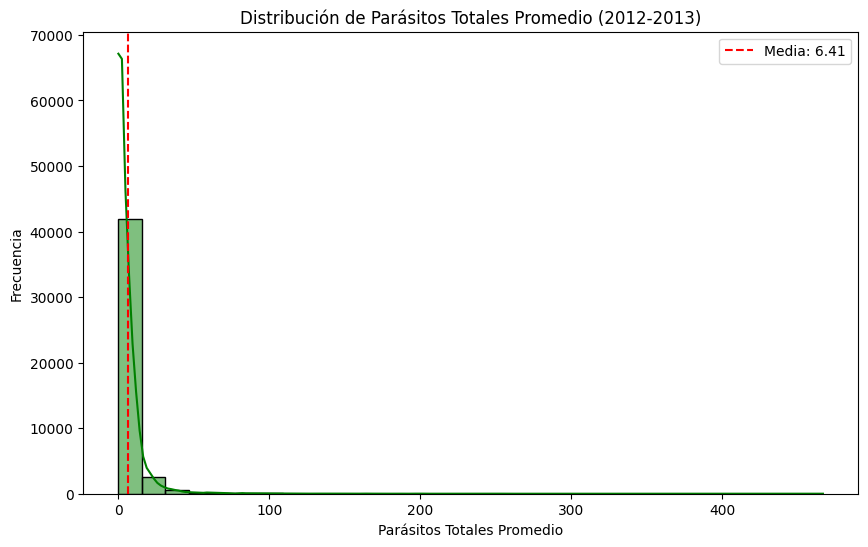

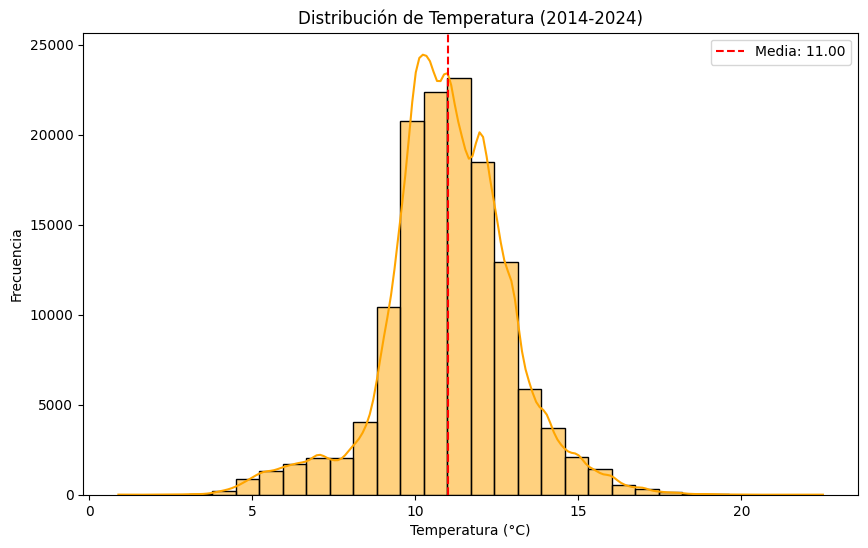

Media de Salinidad: 28.01
Mediana de Salinidad: 30.00
Desviación estándar de Salinidad: 5.53


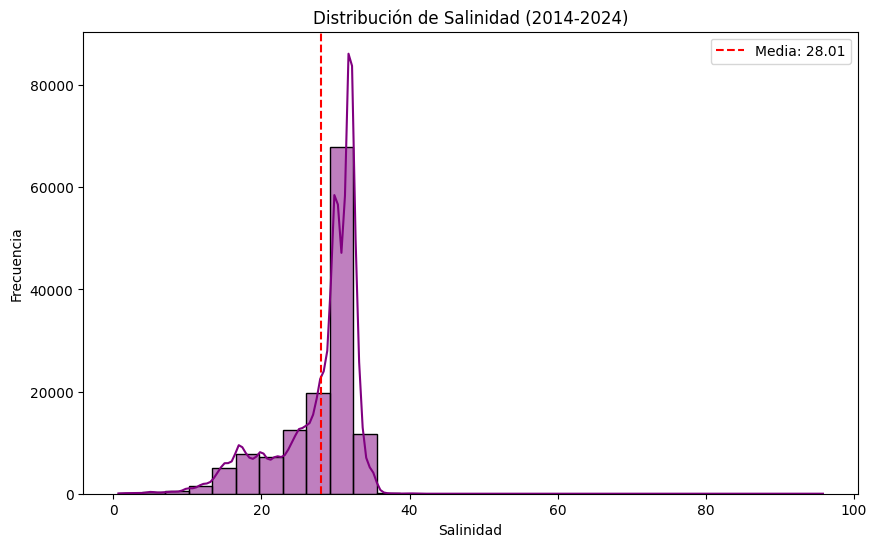

In [71]:
import seaborn as sns
# Distribución de Prom. Parásitos Totales
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Prom. Parásitos Totales'], bins=30, kde=True, color='blue')
plt.title('Distribución de Prom. Parásitos Totales (2014-2024)')
plt.xlabel('Prom. Parásitos Totales')
plt.ylabel('Frecuencia')
plt.axvline(df_cleaned['Prom. Parásitos Totales'].mean(), color='red', linestyle='--', label=f"Media: {df_cleaned['Prom. Parásitos Totales'].mean():.2f}")
plt.legend()
plt.show()

# Distribución de Prom. Parásitos Totales (2012-2013)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned2['Parásitos totales promedio'], bins=30, kde=True, color='green')
plt.title('Distribución de Parásitos Totales Promedio (2012-2013)')
plt.xlabel('Parásitos Totales Promedio')
plt.ylabel('Frecuencia')
plt.axvline(df_cleaned2['Parásitos totales promedio'].mean(), color='red', linestyle='--', label=f"Media: {df_cleaned2['Parásitos totales promedio'].mean():.2f}")
plt.legend()
plt.show()

# Distribución de Temperatura
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Temperatura'], bins=30, kde=True, color='orange')
plt.title('Distribución de Temperatura (2014-2024)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.axvline(df_cleaned['Temperatura'].mean(), color='red', linestyle='--', label=f"Media: {df_cleaned['Temperatura'].mean():.2f}")
plt.legend()
plt.show()

# Distribución de Salinidad
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Salinidad'], bins=30, kde=True, color='purple')
plt.title('Distribución de Salinidad (2014-2024)')
# Calcular estadísticas descriptivas para Salinidad
salinidad_mean = df_cleaned['Salinidad'].mean()
salinidad_median = df_cleaned['Salinidad'].median()
salinidad_std = df_cleaned['Salinidad'].std()

# Mostrar los resultados
print(f"Media de Salinidad: {salinidad_mean:.2f}")
print(f"Mediana de Salinidad: {salinidad_median:.2f}")
print(f"Desviación estándar de Salinidad: {salinidad_std:.2f}")
plt.ylabel('Frecuencia')
plt.axvline(df_cleaned['Salinidad'].mean(), color='red', linestyle='--', label=f"Media: {df_cleaned['Salinidad'].mean():.2f}")
plt.legend()
plt.show()

In [117]:
df_unificado = pd.concat([df_cleaned, df_cleaned2], ignore_index=True)

# Verificar el resultado
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180258 entries, 0 to 180257
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Código Centro               180258 non-null  object 
 1   semana                      134736 non-null  float64
 2   Año                         134736 non-null  float64
 3   Región                      180258 non-null  object 
 4   ACS                         180258 non-null  object 
 5   Especie                     180258 non-null  object 
 6   Prom. Hembras Ovígeras      134736 non-null  float64
 7   Prom. Adultos Móviles       134736 non-null  float64
 8   Prom. Juveniles             134736 non-null  float64
 9   Prom. Parásitos Totales     134736 non-null  float64
 10  Temperatura                 134736 non-null  float64
 11  Salinidad                   134736 non-null  float64
 12  Período                     45522 non-null   object 
 13  Temperatura Pr

In [ ]:
# Sumar las columnas y eliminar las originales
df_cleaned['Temperatura'] += df_cleaned2['Temperatura Promedio'] 
df_cleaned['Prom. Juveniles'] += df_cleaned2['Promedio Juv,'] 
df_cleaned['Prom. Hembras Ovígeras'] += df_cleaned2['Promedio HO'] 
df_cleaned['Prom. Parásitos Totales'] += df_cleaned2['Parásitos totales promedio'] 
df_cleaned['Salinidad'] +=df_cleaned2['Salinidad Promedio'] 
df_cleaned['Prom. Adultos Móviles'] += df_cleaned2['Promedio AM']

# Verificar el resultado
df_unificado.info()


KeyError: "['Temperatura', 'Prom. Juveniles', 'Prom. Hembras Ovígeras', 'Prom. Parásitos Totales', 'Salinidad'] not found in axis"

In [ ]:
import seaborn as sns

# Histograma de Prom. Parásitos Totales
plt.figure(figsize=(10, 6))
sns.histplot(df_unificado['Prom. Parásitos Totales'], bins=30, kde=True, color='blue')
plt.title('Histograma de Prom. Parásitos Totales')
plt.xlabel('Prom. Parásitos Totales')
plt.ylabel('Frecuencia')
plt.show()

KeyError: 'Prom. Parásitos Totales'

<Figure size 1000x600 with 0 Axes>

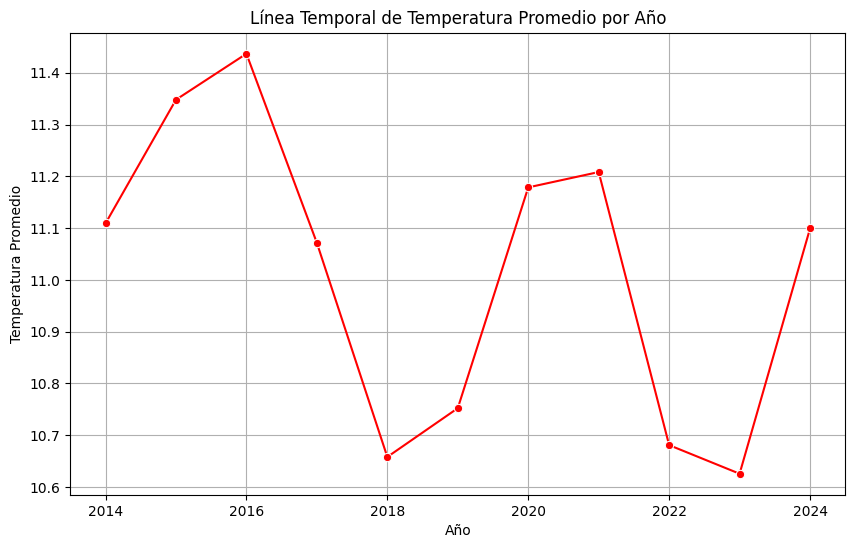

In [ ]:
# Línea temporal de temperatura promedio por año
df_unificado['Año'] = pd.to_numeric(df_unificado['Año'], errors='coerce').fillna(0).astype(int)
temp_avg_by_year = df_unificado.groupby('Año')['Temperatura'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=temp_avg_by_year, x='Año', y='Temperatura', marker='o', color='red')
plt.title('Línea Temporal de Temperatura Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio')
plt.grid()
plt.show()

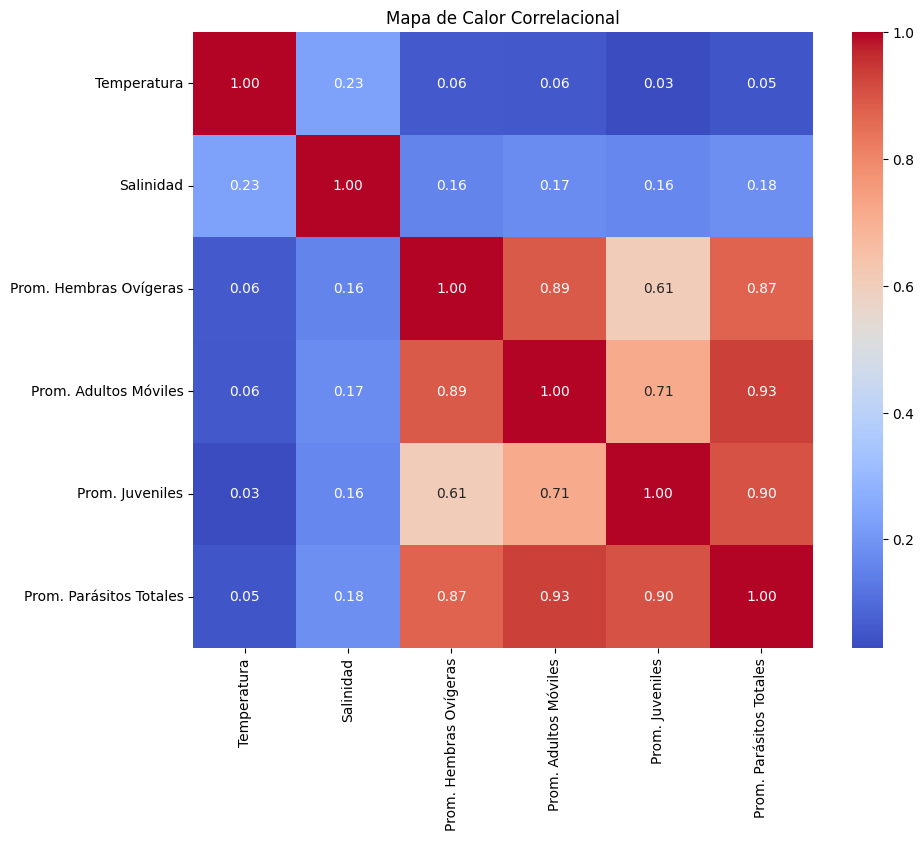

In [ ]:
# Mapa de calor correlacional entre variables ambientales y biológicas
correlation_matrix = df_unificado[['Temperatura', 'Salinidad', 'Prom. Hembras Ovígeras', 
                                 'Prom. Adultos Móviles', 'Prom. Juveniles', 'Prom. Parásitos Totales']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor Correlacional')
plt.show()

C:\Users\jarpa\AppData\Local\Temp\ipykernel_32236\1225871152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_unificado, x='Especie', y='Prom. Parásitos Totales', palette='Set2')


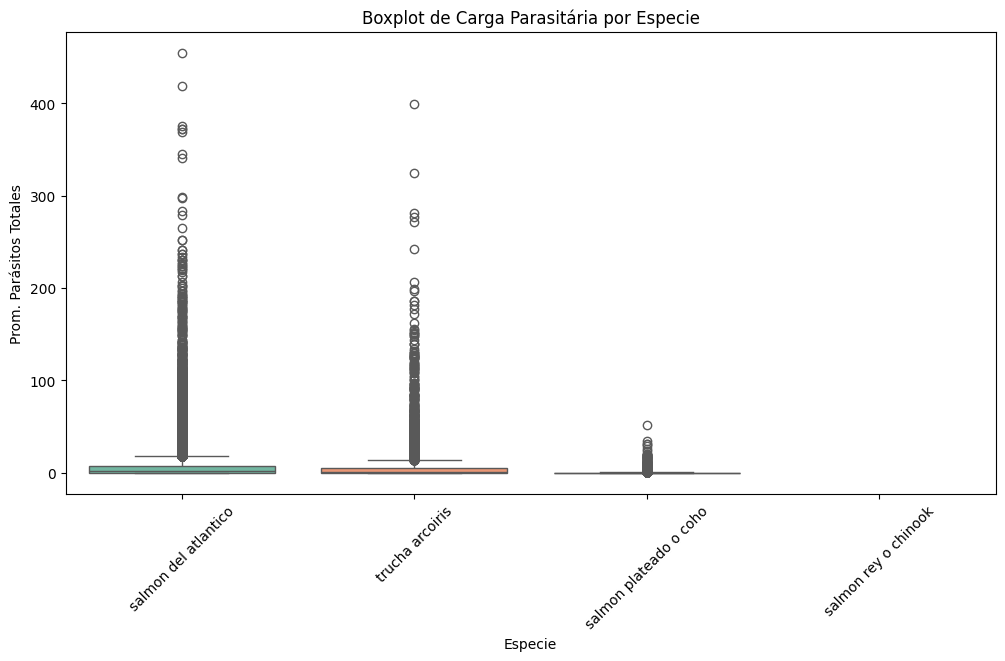

In [ ]:
# Convertir los valores de la columna 'Especie' a minúsculas
df_unificado['Especie'] = df_unificado['Especie'].str.lower()

# Boxplot de carga parasitaria por especie
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_unificado, x='Especie', y='Prom. Parásitos Totales', palette='Set2')
plt.title('Boxplot de Carga Parasitária por Especie')
plt.xlabel('Especie')
plt.ylabel('Prom. Parásitos Totales')
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()


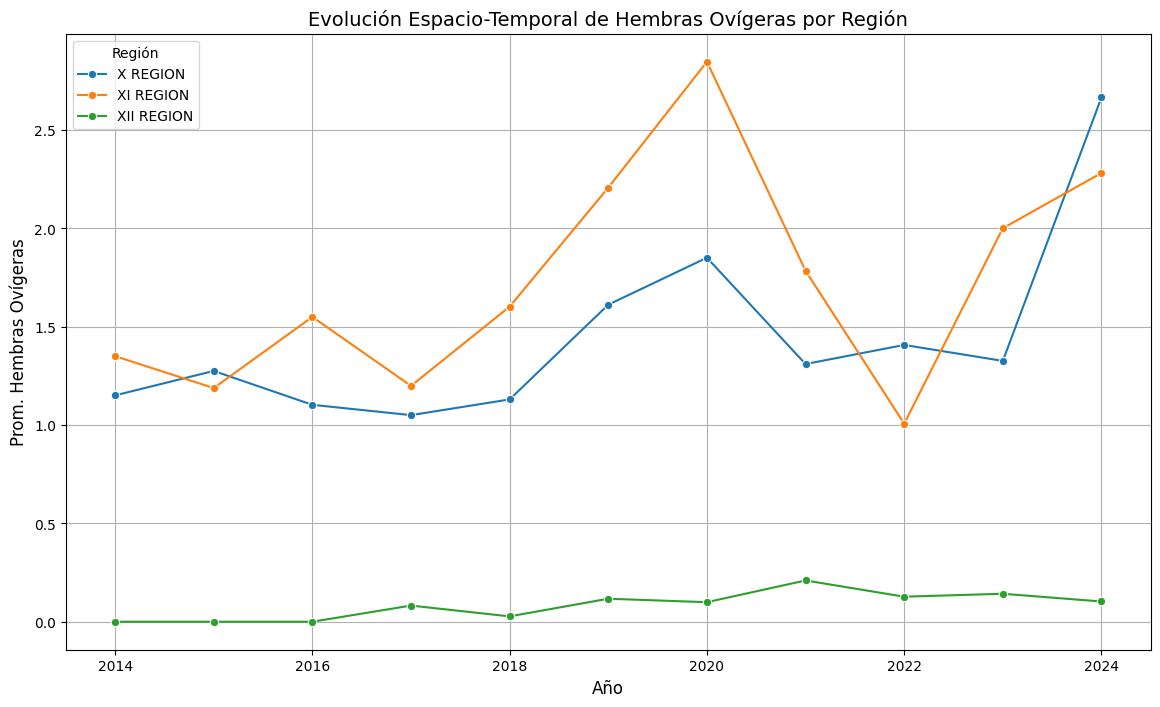

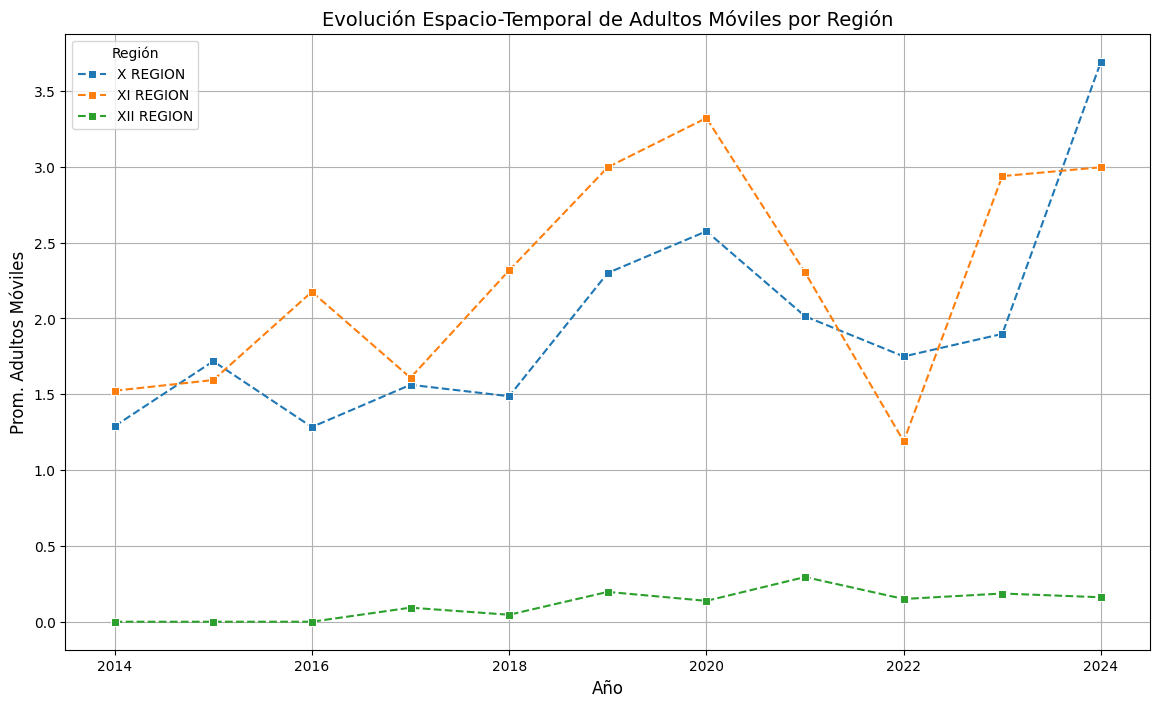

In [ ]:
# Agrupar por Año y Región, calculando la media de 'Prom. Hembras Ovígeras' y 'Prom. Adultos Móviles'
evolucion_ovigeros_hembras = df_unificado.groupby(['Año', 'Región'])[['Prom. Hembras Ovígeras', 'Prom. Adultos Móviles']].mean().reset_index()

# Crear el gráfico para 'Prom. Hembras Ovígeras'
plt.figure(figsize=(14, 8))
sns.lineplot(data=evolucion_ovigeros_hembras, x='Año', y='Prom. Hembras Ovígeras', hue='Región', marker='o')
plt.title('Evolución Espacio-Temporal de Hembras Ovígeras por Región', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Prom. Hembras Ovígeras', fontsize=12)
plt.legend(title='Región', loc='upper left')
plt.grid()
plt.show()

# Crear el gráfico para 'Prom. Adultos Móviles'
plt.figure(figsize=(14, 8))
sns.lineplot(data=evolucion_ovigeros_hembras, x='Año', y='Prom. Adultos Móviles', hue='Región', marker='s', linestyle='--')
plt.title('Evolución Espacio-Temporal de Adultos Móviles por Región', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Prom. Adultos Móviles', fontsize=12)
plt.legend(title='Región', loc='upper left')
plt.grid()
plt.show()

In [ ]:
# Calcular el promedio de parásitos totales y hembras ovígeras
promedio_parasitos_totales = df_unificado['Prom. Parásitos Totales'].mean()
promedio_hembras_ovigeras = df_unificado['Prom. Hembras Ovígeras'].mean()

# Filtrar solo las filas donde la especie es "salmon del atlantico"
salmones = df_unificado[df_unificado['Especie'] == 'salmon del atlantico']
# Calcular el promedio de hembras ovígeras en los salmones
promedio_hembras_ovigeras_salmones = salmones['Prom. Hembras Ovígeras'].mean()

# Mostrar el resultado
print(f"Promedio de hembras ovígeras en los salmones: {promedio_hembras_ovigeras_salmones:.2f}")
# Calcular el promedio de parásitos totales en los salmones
promedio_parasitos_salmones = salmones['Prom. Parásitos Totales'].mean()

# Mostrar el resultado
print(f"Promedio de parásitos totales en los salmones: {promedio_parasitos_salmones:.2f}")
print(f"Promedio de parásitos totales: {promedio_parasitos_totales:.2f}")
print(f"Promedio de hembras ovígeras: {promedio_hembras_ovigeras:.2f}")

Promedio de parásitos totales: 5.70
Promedio de hembras ovígeras: 1.42


In [ ]:
# Calcular el promedio de parásitos totales y hembras ovígeras
promedio_parasitos_totales = df_unificado['Prom. Parásitos Totales'].mean()
promedio_hembras_ovigeras = df_unificado['Prom. Hembras Ovígeras'].mean()

# Filtrar solo las filas donde la especie es "salmon del atlantico"
salmones = df_unificado[df_unificado['Especie'] == 'salmon del atlantico']
# Calcular el promedio de hembras ovígeras en los salmones
promedio_hembras_ovigeras_salmones = salmones['Prom. Hembras Ovígeras'].mean()

# Mostrar el resultado
print(f"Promedio de hembras ovígeras en los salmones: {promedio_hembras_ovigeras_salmones:.2f}")
# Calcular el promedio de parásitos totales en los salmones
promedio_parasitos_salmones = salmones['Prom. Parásitos Totales'].mean()

# Mostrar el resultado
print(f"Promedio de parásitos totales en los salmones: {promedio_parasitos_salmones:.2f}")
print(f"Promedio de parásitos totales: {promedio_parasitos_totales:.2f}")
print(f"Promedio de hembras ovígeras: {promedio_hembras_ovigeras:.2f}")

Promedio de hembras ovígeras en los salmones: 1.53
Promedio de parásitos totales en los salmones: 6.12
Promedio de parásitos totales: 5.70
Promedio de hembras ovígeras: 1.42


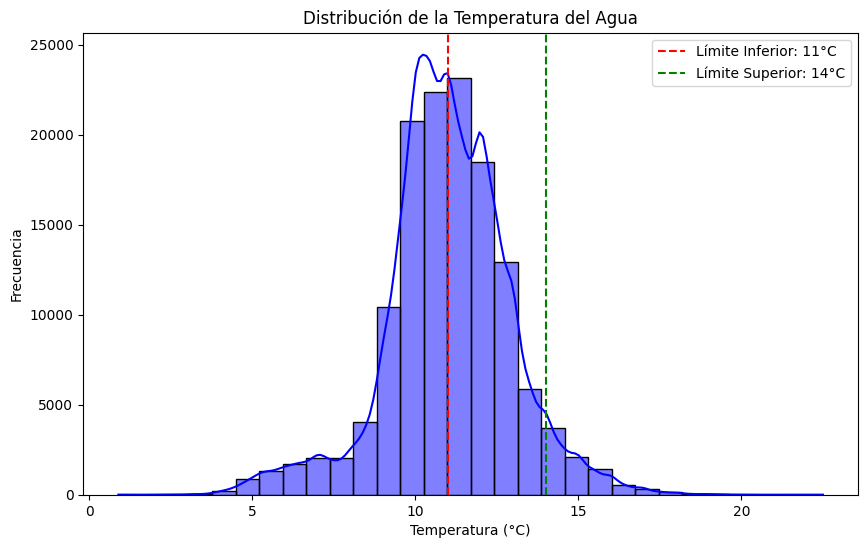

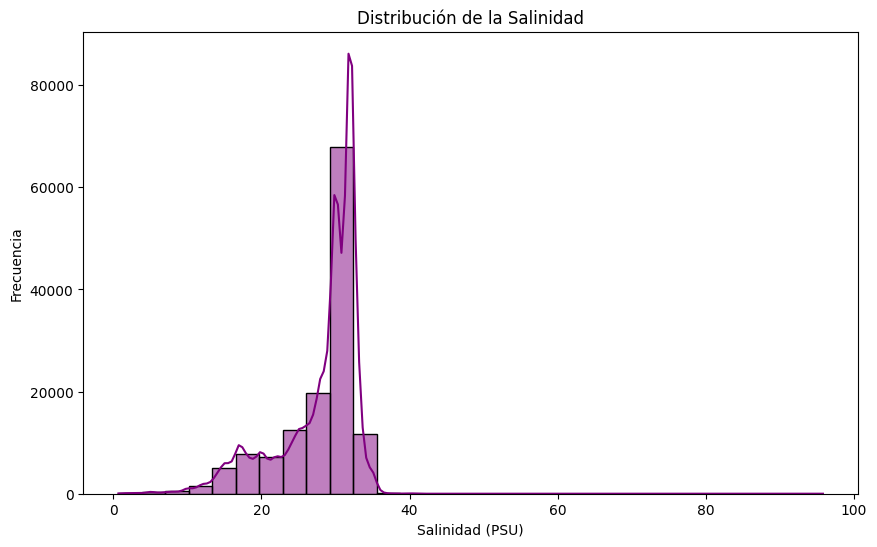

In [ ]:
# Histograma de la temperatura
plt.figure(figsize=(10, 6))
sns.histplot(df_unificado['Temperatura'], bins=30, kde=True, color='blue')
plt.title('Distribución de la Temperatura del Agua')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.axvline(11, color='red', linestyle='--', label='Límite Inferior: 11°C')
plt.axvline(14, color='green', linestyle='--', label='Límite Superior: 14°C')
plt.legend()
plt.show()

# Histograma de la salinidad
plt.figure(figsize=(10, 6))
sns.histplot(df_unificado['Salinidad'], bins=30, kde=True, color='purple')
plt.title('Distribución de la Salinidad')
plt.xlabel('Salinidad (PSU)')
plt.ylabel('Frecuencia')
plt.show()